In [46]:

import numpy as np
import matplotlib.pyplot as plt

# Import necessary packages

import pandas as pd
from time import sleep

In [117]:
def PrepareData(csv_file, isUSB = False):
    if isUSB:
        df = pd.read_csv(csv_file, skiprows=8,usecols=['Reading', 'Value'])  
        voltage = df.iloc[:, 1]  # the first column is Voltage
        current = df.iloc[:, 0]  # the second column is Current
    else:
        df = pd.read_csv(csv_file, skiprows=0,usecols=['Current (A)', 'Voltage (V)'])  
        voltage = df.iloc[:, 0]  # the first column is Voltage
        current = df.iloc[:, 1]  # the second column is Current
    return np.array(-voltage), np.array(current)

def Derivative(x,y):
    
    dydx = np.diff(np.array(-y)) / np.diff(x)
    x2 = (x[:-1] + x[1:]) / 2
    return dydx, x2
    


In [121]:
#vol_usb,  cur_usb = PrepareData('defbuffer1_0725_141237.csv', True)
vol_daq,  cur_daq = PrepareData('SiPM_IV_Curve2024072530.csv')
vol_usb,  cur_usb =  PrepareData('../FirstSiPM_ScopeData/defbuffer1_0622_051813.csv', True)



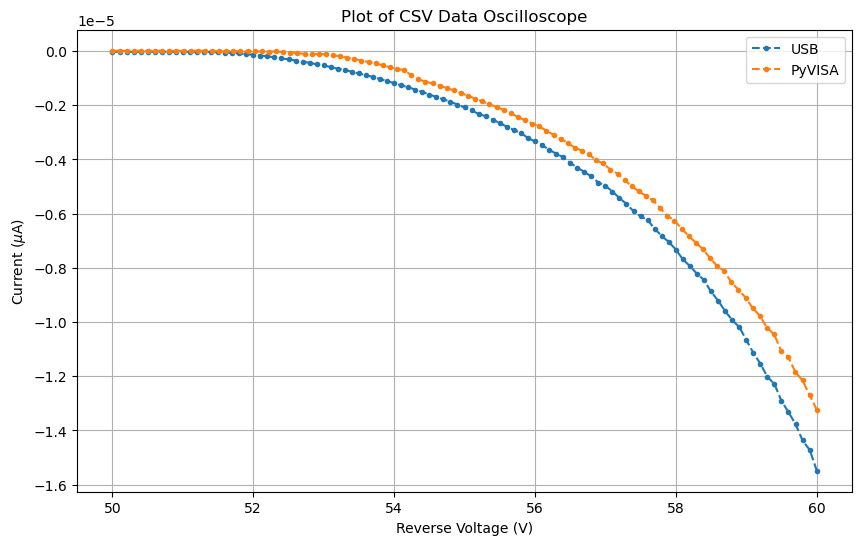

In [122]:
# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(vol_usb, cur_usb, marker='.', linestyle='--', label = 'USB')
plt.plot(vol_daq, cur_daq, marker='.', linestyle='--', label = 'PyVISA')
plt.ylabel(r'Current ($\mu$A)')
plt.xlabel('Reverse Voltage (V)')
plt.title('Plot of CSV Data Oscilloscope')
plt.legend()
plt.grid()

plt.show()

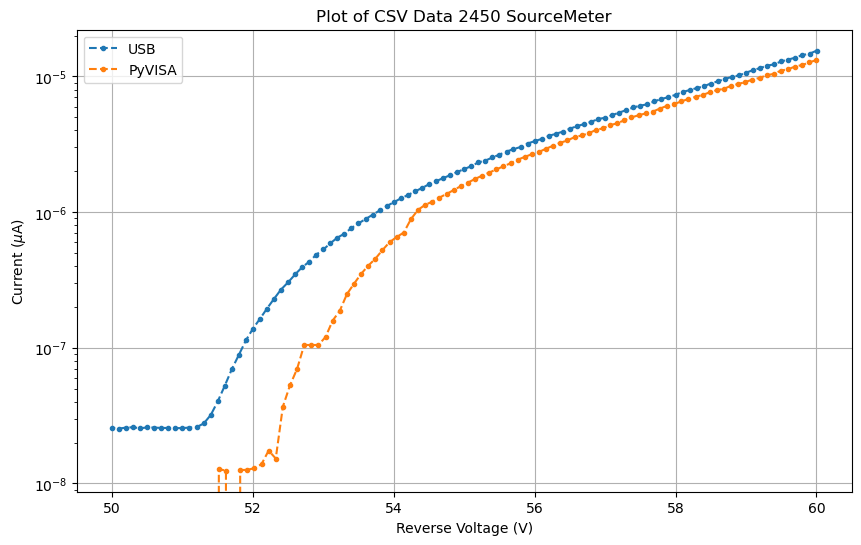

In [123]:
plt.figure(figsize=(10, 6))
plt.plot(vol_usb, -cur_usb, marker='.', linestyle='--', label = 'USB')
plt.plot(vol_daq, -cur_daq, marker='.', linestyle='--', label = 'PyVISA')
plt.yscale('log')
plt.ylabel(r'Current ($\mu$A)')
plt.xlabel('Reverse Voltage (V)')
plt.title('Plot of CSV Data 2450 SourceMeter')
plt.legend()
plt.grid()

In [124]:
der_usb , x2_usb  = Derivative(vol_usb, cur_usb)
der_daq , x2_daq  = Derivative(vol_daq, cur_daq)

cur_usb_ = (cur_usb[:-1] + cur_usb[1:]) / 2
cur_daq_ = (cur_daq[:-1] + cur_daq[1:]) / 2 

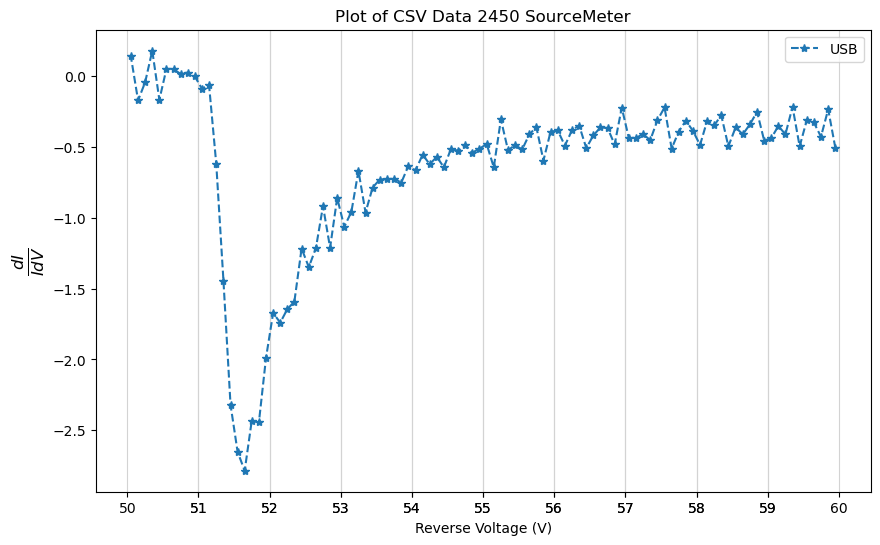

In [126]:


# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(x2_usb, der_usb/cur_usb_, marker='*', linestyle='--', label = 'USB')
#plt.plot(x2_daq, der_daq/cur_daq_, marker='*', linestyle='--', label = 'pyVISA')
plt.ylabel(r'$\frac{dI}{IdV}$', fontsize =17, rotation = 'vertical')
plt.xticks(np.round(np.linspace(50,60,20)))
plt.legend()
plt.grid(axis='x', color='lightgray', linestyle='-')
plt.xlabel('Reverse Voltage (V)')
plt.title('Plot of CSV Data 2450 SourceMeter')
plt.show()